# Import the basic package

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import nltk

In [3]:
train_df=pd.read_csv(r"E:\datasets\NLP datasets\sentiment_train",sep='\t')

In [6]:
pd.set_option('max_colwidth',800)

In [7]:
# Positive sentiment
train_df.head()

,sentiment,text
0,1,The Da Vinci Code book is just awesome.
1,1,"this was the first clive cussler i've ever read, but even books like Relic, and Da Vinci code were more plausible than this."
2,1,i liked the Da Vinci Code a lot.
3,1,i liked the Da Vinci Code a lot.
4,1,I liked the Da Vinci Code but it ultimatly didn't seem to hold it's own.


In [8]:
# Negative sentiment
train_df.tail()

,sentiment,text
6913,0,Brokeback Mountain was boring.
6914,0,So Brokeback Mountain was really depressing.
6915,0,"As I sit here, watching the MTV Movie Awards, I am reminded of how much I despised the movie Brokeback Mountain."
6916,0,Ok brokeback mountain is such a horrible movie.
6917,0,"Oh, and Brokeback Mountain was a terrible movie."


In [9]:
# Exploring the datasets
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6918 entries, 0 to 6917
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  6918 non-null   int64 
 1   text       6918 non-null   object
dtypes: int64(1), object(1)
memory usage: 108.2+ KB


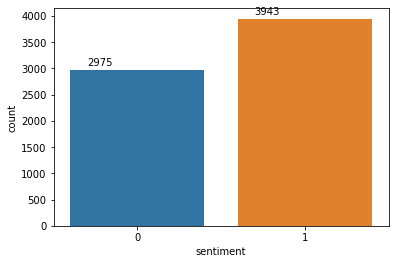

In [12]:
# Visualisation
ax=sns.countplot(train_df['sentiment'])
# annotate
for i in ax.patches:
    ax.annotate(i.get_height(),(i.get_x()+0.1,(i.get_height()+80)))

# Text Processing

In [15]:
# creating count_vector for sentiment_train_dataset
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer=CountVectorizer()

# create a dictionary from the corpus
feature_vector=count_vectorizer.fit(train_df.text)

# get the features name
features=feature_vector.get_feature_names()
print("total no.of features ", len(features))

total no.of features  2132


In [18]:
features

['00',
 '007',
 '10',
 '10pm',
 '12',
 '16',
 '17',
 '1984',
 '1st',
 '200',
 '2007',
 '286',
 '2nd',
 '30',
 '31st',
 '33',
 '3333',
 '385',
 '50',
 '517',
 '648',
 '6th',
 '700',
 '7th',
 '8230',
 '9am',
 'aaron',
 'able',
 'abortion',
 'about',
 'abrams',
 'absolute',
 'absolutely',
 'absurd',
 'academy',
 'acceptable',
 'accompaniment',
 'according',
 'account',
 'achieved',
 'aching',
 'acne',
 'acoustic',
 'acting',
 'action',
 'actor',
 'actors',
 'actual',
 'actually',
 'adaptation',
 'add',
 'addition',
 'admired',
 'admiring',
 'adorable',
 'adore',
 'adult',
 'adversity',
 'afraid',
 'after',
 'afterschool',
 'afterwards',
 'again',
 'against',
 'ago',
 'agree',
 'agreed',
 'ah',
 'aimee',
 'ain',
 'aka',
 'al',
 'alarm',
 'all',
 'allegedly',
 'allegory',
 'almost',
 'along',
 'already',
 'alright',
 'also',
 'although',
 'altogether',
 'always',
 'am',
 'amazes',
 'amazing',
 'amazingly',
 'america',
 'amã',
 'an',
 'anatomy',
 'anax',
 'and',
 'ang',
 'angel',
 'angels',


In [20]:
train_df_features=count_vectorizer.transform(train_df.text)
type(train_df_features)

scipy.sparse.csr.csr_matrix

In [21]:
train_df_features.shape

(6918, 2132)

In [22]:
# Total sparse metrix
# getnnz()----Count of 0
train_df_features.getnnz()

65398

In [26]:
# Total actual values
print("Density of matrix",train_df_features.getnnz()*100/(train_df_features.shape[0]*train_df_features.shape[1]))

Density of matrix 0.4434010415225908


In [28]:
# Displaying the documents vector

# converting matrix into datafram
train_df_dataframe=pd.DataFrame(train_df_features.todense())

# setting the columns name with features i.e words
train_df_dataframe.columns=features

In [29]:
train_df_dataframe.head()

,00,007,10,10pm,12,16,17,1984,1st,200,...,yip,you,young,younger,your,yuck,yuh,zach,zen,µª
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
train_df_dataframe.iloc[0:1,150:165]

,away,awesome,awesomely,awesomeness,awesomest,awful,awkward,axes,azkaban,baby,bachelor,back,backdrop,background,backtory
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [50]:
# removing the low frequency words

# summing up the occurances of features column wise

features_counts = np.sum(train_df_features.toarray(), axis=0)
features_counts_df = pd.DataFrame(dict(features= features, counts = features_counts))

In [52]:
features_counts_df.head()

,features,counts
0,00,1
1,007,1
2,10,4
3,10pm,1
4,12,1


Text(0, 0.5, 'Density')

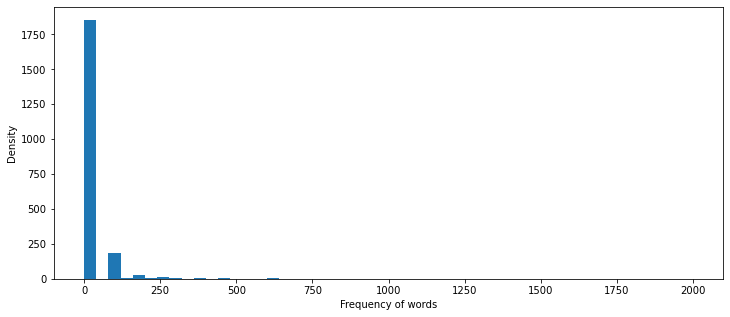

In [51]:
plt.figure(figsize=(12,5))
plt.hist(features_counts_df.counts, bins = 50, range = (0,2000))
plt.xlabel("Frequency of words")
plt.ylabel("Density")

In [56]:
print(len(features_counts_df[features_counts_df.counts==1]))
print("------------------")
print(len(features_counts_df[features_counts_df.counts==0]))

1228
------------------
0


In [66]:
countvectorizer=CountVectorizer(max_features=1000)
features_vector=countvectorizer.fit(train_df.text)
features = features_vector.get_feature_names()
train_df_features=countvectorizer.transform(train_df.text)
features_counts=np.sum(train_df_features.toarray(),axis=0)
features_counts=pd.DataFrame(dict(features=features , count = features_counts))
features_counts.sort_values('count',ascending=True)[0:10]

,features,count
652,plausible,1
700,pudding,1
591,outnumbered,1
625,period,1
677,power,1
701,pull,1
588,others,1
702,pup,1
676,potterholic,1
703,purchase,1


In [67]:
countvectorizer=CountVectorizer(max_features=1000)
features_vectorizer=count_vectorizer.fit(train_df.text)
features=features_vectorizer.get_feature_names()
train_df_features=count_vectorizer.transform(train_df.text)
features_counts=np.sum(train_df_features.toarray(),axis=0)
features_counts=pd.DataFrame(dict(features=features , count= features_counts))
features_counts.sort_values('count',ascending=False)[0:50]

,features,count
1864,the,3306
93,and,2154
864,harry,2093
1466,potter,2093
355,code,2002
2009,vinci,2001
442,da,2001
1272,mountain,2000
259,brokeback,2000
1171,love,1624


In [70]:
# Remove stopwords
from sklearn.feature_extraction import text
my_stop_words=text.ENGLISH_STOP_WORDS
print("Few_stop_words",list(my_stop_words)[0:20])

Few_stop_words ['former', 'system', 'or', 'if', 'else', 'someone', 'amongst', 'only', 'still', 'may', 'mine', 'own', 'full', 'inc', 'none', 'six', 'ours', 'becomes', 'whoever', 'etc']


In [71]:
my_stop_words

frozenset({'a',
           'about',
           'above',
           'across',
           'after',
           'afterwards',
           'again',
           'against',
           'all',
           'almost',
           'alone',
           'along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'around',
           'as',
           'at',
           'back',
           'be',
           'became',
           'because',
           'become',
           'becomes',
           'becoming',
           'been',
           'before',
           'beforehand',
           'behind',
           'being',
           'below',
           'beside',
           'besides'

In [72]:
my_stop_words=text.ENGLISH_STOP_WORDS.union(['harry','potter','mountain'])

In [80]:
# Creating count vectors
countvectorizer=CountVectorizer(max_features=1000,stop_words=my_stop_words)
feature_vector=countvectorizer.fit(train_df.text)
train_df_features=countvectorizer.transform(train_df.text)
features = feature_vector.get_feature_names()
feature_counts=np.sum(train_df_features.toarray(),axis=0)
feature_counts=pd.DataFrame(dict(features=features ,counts=feature_counts))
feature_counts.sort_values('counts', ascending=False)[0:10]

,features,counts
103,code,2002
141,da,2001
903,vinci,2001
72,brokeback,2000
409,love,1624
38,awesome,1127
437,mission,1094
342,impossible,1093
391,like,974
443,movie,783


In [88]:
# Stemming
from nltk.stem.snowball import SnowballStemmer
stemmer=SnowballStemmer(language='english')
analyzer=CountVectorizer().build_analyzer()

def stemmed_words(doc):
    stemmed_words=[stemmer.stem(w) for w in analyzer(doc)]
    non_stop_words=[word for word in list(set(stemmed_words)-set(my_stop_words))]
    return non_stop_words

In [89]:
countvectorizer=CountVectorizer(analyzer=stemmed_words,max_features=1000)
features_vectorizer=countvectorizer.fit(train_df.text)
features=features_vectorizer.get_feature_names()
train_df_features=countvectorizer.transform(train_df.text)
features_count=np.sum(train_df_features.toarray(),axis=0)
features_count_df=pd.DataFrame(dict(features=features, counts=features_count))
features_count_df.sort_values('counts',ascending=False)[0:20]

,features,counts
108,code,1984
144,da,1982
917,vinci,1982
80,brokeback,1930
299,harri,1916
409,love,1837
790,suck,1378
43,awesom,1116
347,imposs,1090
435,mission,1090


In [90]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6918 entries, 0 to 6917
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  6918 non-null   int64 
 1   text       6918 non-null   object
dtypes: int64(1), object(1)
memory usage: 108.2+ KB


In [93]:
train_df_df=pd.DataFrame(train_df_features.todense())
train_df_df.columns=features # independent variable
train_df_df['sentiment']=train_df.sentiment # dependent variable


In [95]:
train_df_df.head()

,10,17,33,6th,abl,absolut,absurd,academi,accept,accompani,...,yes,yesterday,yip,young,younger,yuck,yuh,zach,zen,sentiment
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


<AxesSubplot:xlabel='sentiment', ylabel='code'>

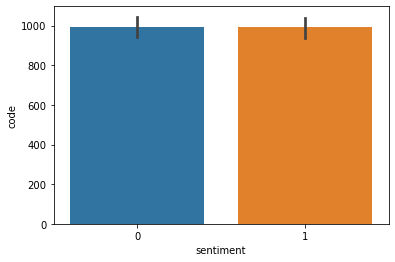

In [94]:
sns.barplot(x='sentiment',y='code',data=train_df_df,estimator=sum)

In [97]:
x=train_df_features

In [98]:
y=train_df_df['sentiment']

# split into train-test

In [99]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.75,random_state=101)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5188, 1000)
(1730, 1000)
(5188,)
(1730,)


# Buliding a ML  model-Naive Bayes Model

In [103]:
from sklearn.naive_bayes import BernoulliNB
nb_clf=BernoulliNB()
nb_clf.fit(x_train.toarray(),y_train)

BernoulliNB()

In [104]:
y_pred_train=nb_clf.predict(x_train.toarray())
y_pred_test=nb_clf.predict(x_test.toarray())

In [105]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [106]:
print(accuracy_score(y_train,y_pred_train))
print(accuracy_score(y_test,y_pred_test))

0.9915188897455667
0.9884393063583815


In [107]:
print(classification_report(y_train,y_pred_train))
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      2236
           1       0.99      1.00      0.99      2952

    accuracy                           0.99      5188
   macro avg       0.99      0.99      0.99      5188
weighted avg       0.99      0.99      0.99      5188

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       739
           1       0.99      0.99      0.99       991

    accuracy                           0.99      1730
   macro avg       0.99      0.99      0.99      1730
weighted avg       0.99      0.99      0.99      1730



In [108]:
print(confusion_matrix(y_train,y_pred_train))
print("------")
print(confusion_matrix(y_test,y_pred_test))

[[2199   37]
 [   7 2945]]
------
[[726  13]
 [  7 984]]


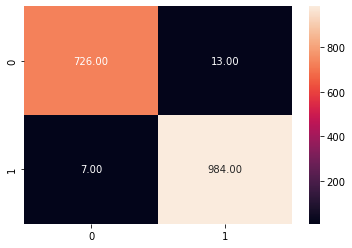

In [109]:
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True, fmt='.2f')
plt.show()